In [ ]:
#We import following Libraries:
#numpy:to perform mathematical tasks.it stands for numerical python.
#pandas:sed for data cleaning,manipulation and Analysis.
#matplotlib.pyplot:it is udsed for plotting graphs.
#seaborn:used for data visualization.

In [103]:
#The data set that i have taken is a stroke dataset where 1=person is suffering from stroke has occured and 0=person is not suffering stroke.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df=pd.read_csv("C:\\Users\\blaise correia\\Documents\\sally\\sd.csv",header=0)#here header=0 implies first row is title row
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.describe()#statistical information of only numeric data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.065753
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.247875
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.describe(include=['O'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [6]:
df.info()#info about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Checking for null values

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#here we calculate mean and std to fill the null values
avg_bmi=df['bmi'].mean()
print(avg_bmi)
std_bmi=df["bmi"].std()
print(std_bmi)

28.893236911794673
7.854066729680158


In [9]:
#since 201 is not a small number we can not drop as we can lose large data so we replace it by random numbers betrween avg_bmi-std_bmi,avg_bmi+std_bmi
for i,data in df.iterrows():#iterates and gives index and data
    if pd.isnull(data["bmi"]):
        r=np.random.uniform(avg_bmi-std_bmi,avg_bmi+std_bmi)
        r=np.round(r,0)
        df.at[i,"bmi"]=r
        print(i," ",df.at[i,"bmi"])
    

1   31.0
8   32.0
13   35.0
19   36.0
27   24.0
29   29.0
43   30.0
46   26.0
50   36.0
51   21.0
54   28.0
57   36.0
64   34.0
70   25.0
78   24.0
81   31.0
84   30.0
105   25.0
112   22.0
124   26.0
126   34.0
129   31.0
133   23.0
146   37.0
150   35.0
160   34.0
161   28.0
162   28.0
167   32.0
170   36.0
171   25.0
174   26.0
178   25.0
183   23.0
189   31.0
198   32.0
200   23.0
218   34.0
227   22.0
247   29.0
342   23.0
360   25.0
432   24.0
477   34.0
479   31.0
522   21.0
668   32.0
671   32.0
680   26.0
729   22.0
742   25.0
865   28.0
867   33.0
872   31.0
879   27.0
903   21.0
936   30.0
965   34.0
1102   23.0
1106   21.0
1115   33.0
1183   37.0
1194   24.0
1214   24.0
1235   28.0
1241   30.0
1277   22.0
1293   26.0
1300   22.0
1306   31.0
1324   31.0
1342   35.0
1352   34.0
1427   31.0
1457   25.0
1466   23.0
1468   21.0
1471   28.0
1503   22.0
1528   23.0
1539   26.0
1546   28.0
1596   31.0
1640   32.0
1644   32.0
1646   22.0
1650   35.0
1669   36.0
1670   25.0
1681   22

In [10]:
#here i have droped the id column since there is already marking on left hand side.
df.drop("id",axis=1,inplace=True) #axis=1 means columns

In [11]:
df #data after replacing null values

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.0,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,27.0,never smoked,1
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,1
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Plotting Graphs for better data visualization

In [12]:
df["work_type"].value_counts()#it gives count of unique values in descending order

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [13]:
df['work_type'].describe()

count        5110
unique          5
top       Private
freq         2925
Name: work_type, dtype: object

<AxesSubplot:>

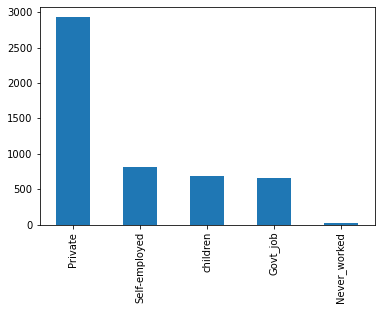

In [14]:
df["work_type"].value_counts().plot(kind='bar')

In [15]:
#from the above graph we can see that most of the people work in private sector and there are very few people who have never worked and almost same number of people who are self-employed or are chidren or have govt_job.

<AxesSubplot:xlabel='work_type'>

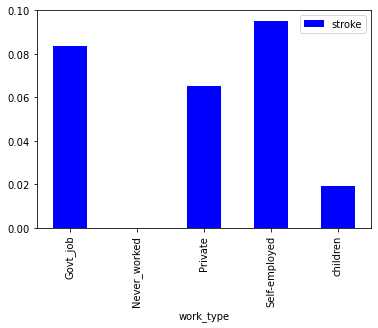

In [16]:
df[["work_type","stroke"]].groupby(["work_type"]).mean().plot(kind='bar',color='b')

In [17]:
#from the above graph we can see that people who are people who are self-employed are afftecd by stroke as compared to others

In [18]:
df[["heart_disease","stroke"]].groupby(["heart_disease"]).mean()

,stroke
heart_disease,
0,0.059785
1,0.170290


<AxesSubplot:xlabel='heart_disease'>

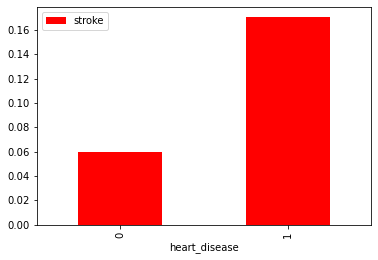

In [19]:
df[["heart_disease","stroke"]].groupby(["heart_disease"]).mean().plot(kind='bar',color='r')

In [20]:
#from the above graph we can see that most people who have heart disease suffer from stroke as compared who do not have heart disease 

In [21]:
df[["hypertension","stroke"]].groupby(["hypertension"]).mean()

,stroke
hypertension,
0,0.057025
1,0.146586


<AxesSubplot:xlabel='hypertension'>

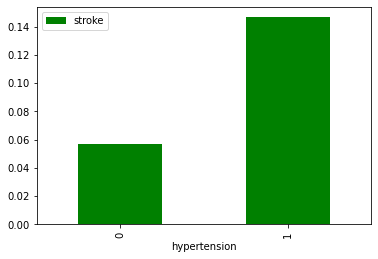

In [22]:
df[["hypertension","stroke"]].groupby(["hypertension"]).mean().plot(kind='bar',color='g')

In [23]:
#from the above graph we can see that most people who have hypertension suffer from stroke as compared who do not have hypertension. 

In [24]:
df[["gender","stroke"]].groupby(["gender"]).mean()

,stroke
gender,
Female,0.066466
Male,0.064775
Other,0.000000


<AxesSubplot:xlabel='gender'>

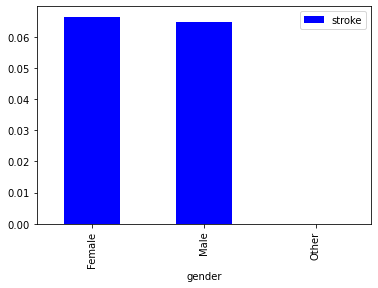

In [25]:
df[["gender","stroke"]].groupby(["gender"]).mean().plot(kind='bar',color='b')

In [26]:
#male and female are equally likely to suffer from stroke so we can infer that stroke does not depend on gender

In [27]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:>

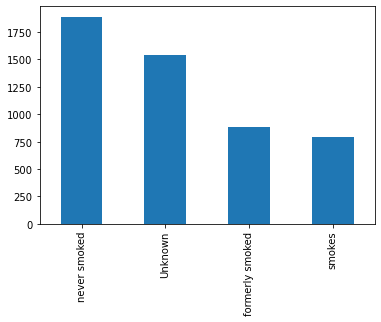

In [28]:
df["smoking_status"].value_counts().plot(kind='bar')

In [29]:
df["Categorical__age"]=pd.qcut(df['age'],4)##qcut is used to define the no. of quantiles and pandas figures out how to divide the data.here we tell pandas to create 4 equal sized groupings of the data. pd.qcut(df['ext price'], q=4)
df["Categorical__age"]

0       (61.0, 82.0]
1       (45.0, 61.0]
2       (61.0, 82.0]
3       (45.0, 61.0]
4       (61.0, 82.0]
            ...     
5105    (61.0, 82.0]
5106    (61.0, 82.0]
5107    (25.0, 45.0]
5108    (45.0, 61.0]
5109    (25.0, 45.0]
Name: Categorical__age, Length: 5110, dtype: category
Categories (4, interval[float64]): [(0.079, 25.0] < (25.0, 45.0] < (45.0, 61.0] < (61.0, 82.0]]

In [30]:
df[["Categorical__age","stroke"]].groupby(['Categorical__age']).mean().sort_values(by='stroke',ascending=False)

,stroke
Categorical__age,
"(61.0, 82.0]",0.151466
"(45.0, 61.0]",0.071994
"(25.0, 45.0]",0.024151
"(0.079, 25.0]",0.020882


<AxesSubplot:xlabel='Categorical__age'>

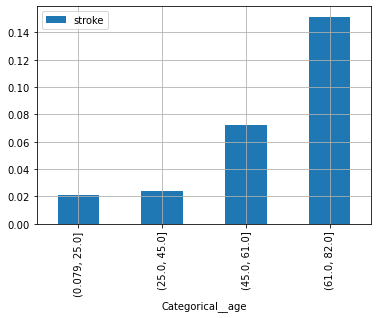

In [31]:
df[["Categorical__age","stroke"]].groupby(["Categorical__age"]).mean().plot(kind='bar',grid='True')

In [32]:
#frequency of stroke is high in people of higher age

In [33]:
df["Categorical__avg_glucose_level"]=pd.cut(df['avg_glucose_level'],4)
df["Categorical__avg_glucose_level"]

0       (217.585, 271.74]
1       (163.43, 217.585]
2       (54.903, 109.275]
3       (163.43, 217.585]
4       (163.43, 217.585]
              ...        
5105    (54.903, 109.275]
5106    (109.275, 163.43]
5107    (54.903, 109.275]
5108    (163.43, 217.585]
5109    (54.903, 109.275]
Name: Categorical__avg_glucose_level, Length: 5110, dtype: category
Categories (4, interval[float64]): [(54.903, 109.275] < (109.275, 163.43] < (163.43, 217.585] < (217.585, 271.74]]

In [34]:
df[["Categorical__avg_glucose_level","stroke"]].groupby(['Categorical__avg_glucose_level']).mean().sort_values(by='stroke',ascending=False)

,stroke
Categorical__avg_glucose_level,
"(217.585, 271.74]",0.156780
"(163.43, 217.585]",0.140097
"(109.275, 163.43]",0.054181
"(54.903, 109.275]",0.054002


<AxesSubplot:xlabel='Categorical__avg_glucose_level'>

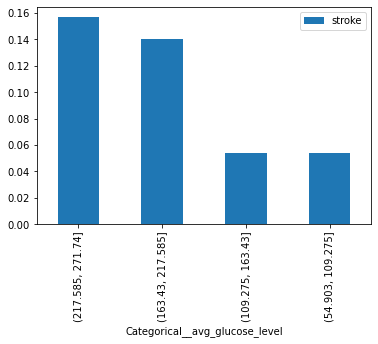

In [35]:
df[["Categorical__avg_glucose_level","stroke"]].groupby(['Categorical__avg_glucose_level']).mean().sort_values(by='stroke',ascending=False).plot(kind='bar')

In [36]:
#from the above graph we can see that the people with high blood sugar aor high gucose level are more peone to accurance of stroke

In [37]:
df["Categorical__bmi"]=pd.cut(df["bmi"],4)
df["Categorical__bmi"]

0        (32.125, 53.95]
1       (10.213, 32.125]
2        (32.125, 53.95]
3        (32.125, 53.95]
4       (10.213, 32.125]
              ...       
5105    (10.213, 32.125]
5106     (32.125, 53.95]
5107    (10.213, 32.125]
5108    (10.213, 32.125]
5109    (10.213, 32.125]
Name: Categorical__bmi, Length: 5110, dtype: category
Categories (4, interval[float64]): [(10.213, 32.125] < (32.125, 53.95] < (53.95, 75.775] < (75.775, 97.6]]

In [38]:
df[["Categorical__bmi","stroke"]].groupby(['Categorical__bmi']).mean().sort_values(by='stroke',ascending=False)

,stroke
Categorical__bmi,
"(32.125, 53.95]",0.068406
"(10.213, 32.125]",0.064985
"(53.95, 75.775]",0.047619
"(75.775, 97.6]",0.000000


<AxesSubplot:xlabel='Categorical__bmi'>

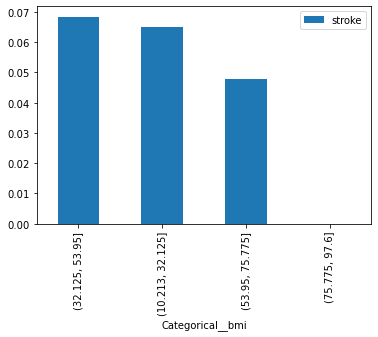

In [39]:
df[["Categorical__bmi","stroke"]].groupby(['Categorical__bmi']).mean().sort_values(by='stroke',ascending=False).plot(kind='bar')

# Detecting Outliers


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

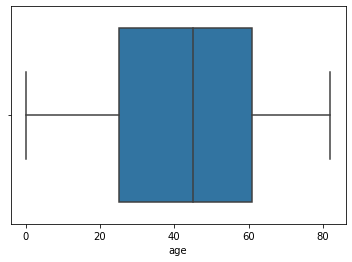

In [40]:
sns.boxplot(df['age'])#no outlier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

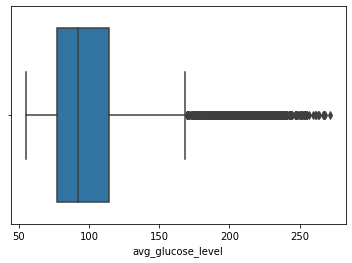

In [41]:
sns.boxplot(df['avg_glucose_level'])#outlier detected

In [42]:
#Here the column avg_glucose_level has outliers so we use IQR to remove them.

In [43]:
#A) check IQR strategy
Q1 = df.avg_glucose_level.quantile(0.25)
Q3 = df.avg_glucose_level.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df[(df['avg_glucose_level']<lower) | (df['avg_glucose_level']>upper)]

print("Number of Outliers Detected in average glucose level:",df2.shape[0])

Number of Outliers Detected in average glucose level: 627


In [44]:
#B) check quantile strategy
# quantile way of outlier

max_val = df['avg_glucose_level'].quantile(0.95)        # df.avg_glucose_level.quantile(0.95)
min_val = df['avg_glucose_level'].quantile(0.05)        # df.avg_glucose_level.quantile(0.05)

df3 = df[(df['avg_glucose_level']<min_val) | (df['avg_glucose_level']>max_val)]

print("Number of Outliers Detected in avg_glucose_level:",df3.shape[0])

Number of Outliers Detected in avg_glucose_level: 512


In [45]:
for i,data in df.iterrows():
    if data['avg_glucose_level']<lower:
        df.at[i,'avg_glucose_level']=lower  # random no in proper range
    elif data['avg_glucose_level']>upper:
        df.at[i,'avg_glucose_level']=upper  # random no in proper range

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

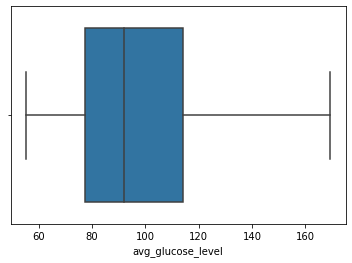

In [46]:
import seaborn as sns
sns.boxplot(df['avg_glucose_level'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

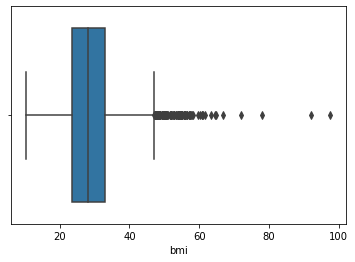

In [47]:
sns.boxplot(df['bmi'])#outlier detected

In [48]:
#Here the column bmi has outliers so we use IQR to remove them.

In [49]:
#A) check IQR strategy
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df[(df['bmi']<lower) | (df['bmi']>upper)]

print("Number of Outliers Detected in bmi:",df2.shape[0])

Number of Outliers Detected in bmi: 117


In [50]:
#B) check quantile strategy
# quantile way of outlier

max_val = df['bmi'].quantile(0.95)        # df.avg_glucose_level.quantile(0.95)
min_val = df['bmi'].quantile(0.05)        # df.avg_glucose_level.quantile(0.05)

df3 = df[(df['bmi']<min_val) | (df['bmi']>max_val)]

print("Number of Outliers Detected in bmi:",df3.shape[0])

Number of Outliers Detected in bmi: 502


In [51]:
for i,data in df.iterrows():
    if data['bmi']<lower:
        df.at[i,'bmi']=lower  # random no in proper range
    elif data['bmi']>upper:
        df.at[i,'bmi']=upper  # random no in proper range

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

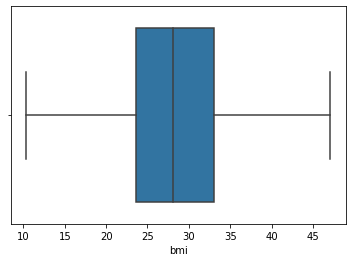

In [52]:
sns.boxplot(df['bmi'])

# Plots of Categorical Columns

In [53]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O'))]
categorical_features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is gender and number of categories are 3
The feature is ever_married and number of categories are 2
The feature is work_type and number of categories are 5
The feature is Residence_type and number of categories are 2
The feature is smoking_status and number of categories are 4


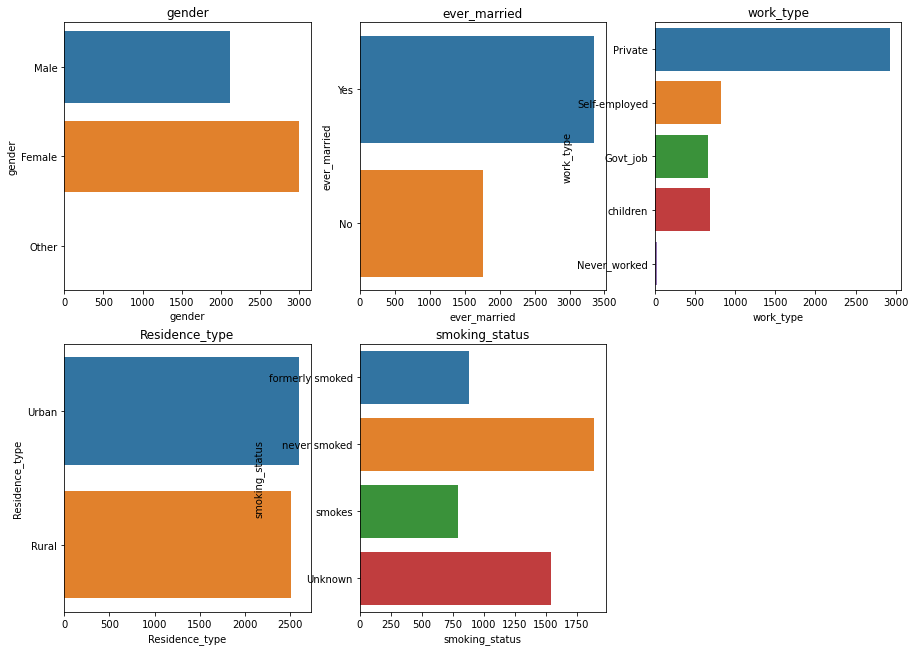

In [54]:
plt.figure(figsize=(15,70), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

# Label Encoding

In [55]:
df["gender"]=df["gender"].astype('category')
df["gender_encode"]=df["gender"].cat.codes
df["Residence_type"]=df["Residence_type"].astype('category')
df["Residence_type_encode"]=df["Residence_type"].cat.codes
df["ever_married"]=df["ever_married"].astype('category')
df["ever_married_encode"]=df["ever_married"].cat.codes
df["work_type"]=df["work_type"].astype('category')
df["work_type_encode"]=df["work_type"].cat.codes
df["smoking_status"]=df["smoking_status"].astype('category')
df["smoking_status_encode"]=df["smoking_status"].cat.codes
df["age"]=df["age"].astype('category')
df["age_encode"]=df["age"].cat.codes
df["bmi"]=df["bmi"].astype('category')
df["bmi_encode"]=df["bmi"].cat.codes
df["avg_glucose_level"]=df["avg_glucose_level"].astype('category')
df["avg_glucose_level_encode"]=df["avg_glucose_level"].cat.codes




In [56]:
df.columns #this gives total columns i.e the encoded as wells the original columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'Categorical__age',
       'Categorical__avg_glucose_level', 'Categorical__bmi', 'gender_encode',
       'Residence_type_encode', 'ever_married_encode', 'work_type_encode',
       'smoking_status_encode', 'age_encode', 'bmi_encode',
       'avg_glucose_level_encode'],
      dtype='object')

In [57]:
#here we drop the unwanted columns to get cleaned data
drop_elements=['gender','ever_married','Residence_type','work_type','smoking_status','bmi','age','avg_glucose_level','Categorical__age','Categorical__avg_glucose_level','Categorical__bmi']
df_cleaned=df.drop(drop_elements,axis=1)

# Cleaned Data after Encoding

In [58]:
df_cleaned

,hypertension,heart_disease,stroke,gender_encode,Residence_type_encode,ever_married_encode,work_type_encode,smoking_status_encode,age_encode,bmi_encode,avg_glucose_level_encode
0,0,1,1,1,1,1,2,1,88,239,3374
1,0,0,1,0,0,1,3,2,82,183,3374
2,0,1,1,1,0,1,2,2,101,198,2483
3,0,0,1,0,1,1,2,3,70,217,3374
4,1,0,1,0,0,1,3,2,100,113,3374
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,0,1,1,2,2,101,143,1360
5106,0,0,1,0,1,1,3,2,102,273,3030
5107,0,0,0,0,0,1,3,2,56,179,1314
5108,0,0,0,1,0,1,2,1,72,129,3363


In [59]:
df_cleaned.to_csv("C:\\Users\\blaise correia\\Documents\\sally\\df_cleaned_sdata.csv")#storing the cleaned data in new location

In [60]:
df_cleaned

,hypertension,heart_disease,stroke,gender_encode,Residence_type_encode,ever_married_encode,work_type_encode,smoking_status_encode,age_encode,bmi_encode,avg_glucose_level_encode
0,0,1,1,1,1,1,2,1,88,239,3374
1,0,0,1,0,0,1,3,2,82,183,3374
2,0,1,1,1,0,1,2,2,101,198,2483
3,0,0,1,0,1,1,2,3,70,217,3374
4,1,0,1,0,0,1,3,2,100,113,3374
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,0,1,1,2,2,101,143,1360
5106,0,0,1,0,1,1,3,2,102,273,3030
5107,0,0,0,0,0,1,3,2,56,179,1314
5108,0,0,0,1,0,1,2,1,72,129,3363


# HeatMap

<AxesSubplot:>

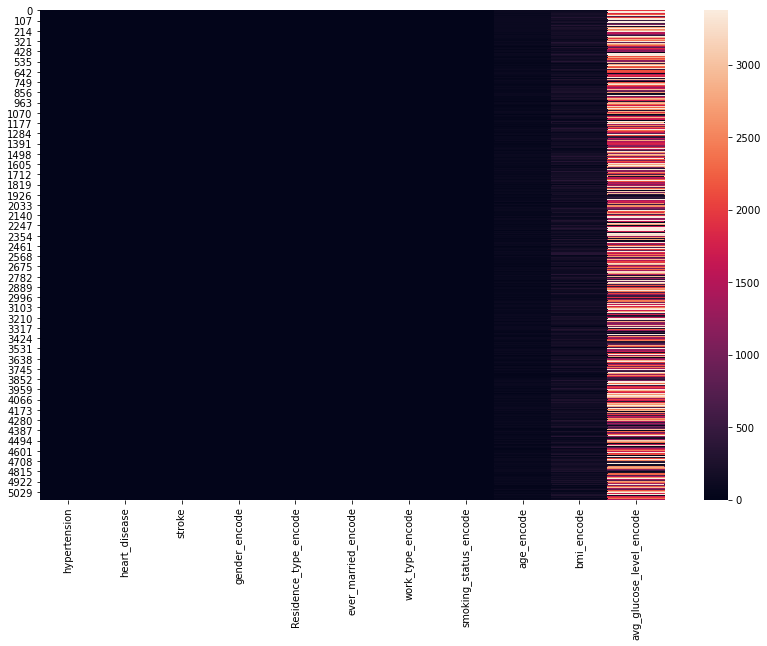

In [61]:
plt.figure(figsize=(14,9))
sns.heatmap(df_cleaned)

In [62]:
correlation=df_cleaned.corr()#this gives correlation of each variable with every other variable
correlation

,hypertension,heart_disease,stroke,gender_encode,Residence_type_encode,ever_married_encode,work_type_encode,smoking_status_encode,age_encode,bmi_encode,avg_glucose_level_encode
hypertension,1.000000,0.108306,0.107169,0.020994,-0.007913,0.164243,-0.051761,0.111038,0.273891,0.153144,0.110322
heart_disease,0.108306,1.000000,0.100781,0.085447,0.003092,0.114644,-0.028023,0.048460,0.260691,0.047190,0.101032
stroke,0.107169,0.100781,1.000000,-0.003523,0.003639,0.095630,-0.045157,0.026057,0.205276,0.037053,0.061595
gender_encode,0.020994,0.085447,-0.003523,1.000000,-0.006738,-0.031005,0.056422,-0.062581,-0.030616,-0.022224,0.048455
Residence_type_encode,-0.007913,0.003092,0.003639,-0.006738,1.000000,0.006261,-0.007316,0.008237,0.013461,0.003727,-0.013046
ever_married_encode,0.164243,0.114644,0.095630,-0.031005,0.006261,1.000000,-0.352722,0.259647,0.678447,0.352616,0.092743
work_type_encode,-0.051761,-0.028023,-0.045157,0.056422,-0.007316,-0.352722,1.000000,-0.305927,-0.370303,-0.314426,-0.021705
smoking_status_encode,0.111038,0.048460,0.026057,-0.062581,0.008237,0.259647,-0.305927,1.000000,0.272053,0.227935,0.035810
age_encode,0.273891,0.260691,0.205276,-0.030616,0.013461,0.678447,-0.370303,0.272053,1.000000,0.356179,0.130598
bmi_encode,0.153144,0.047190,0.037053,-0.022224,0.003727,0.352616,-0.314426,0.227935,0.356179,1.000000,0.104382


# Heat map for correlation

<AxesSubplot:>

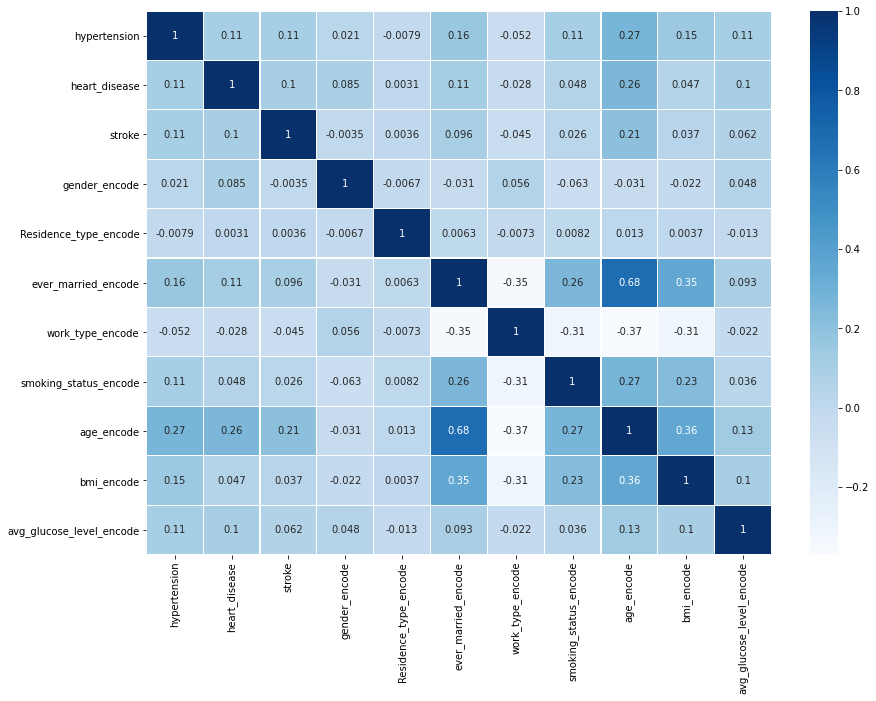

In [63]:
colormap=plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(df_cleaned.corr(),annot=True,cmap=colormap,linewidths=0.2)

In [64]:
#no two variables are highly correlated.
#ever_married_encode and age_encode has moderate positive correlation.
#all other have low or negligible correlation between them.

# Data Modeling

In [65]:
#we store all the feature variables in X and target variable in y
X=df_cleaned.drop('stroke',axis=1) #all feature variables
y=df_cleaned["stroke"]             #only target variable

In [66]:
X

,hypertension,heart_disease,gender_encode,Residence_type_encode,ever_married_encode,work_type_encode,smoking_status_encode,age_encode,bmi_encode,avg_glucose_level_encode
0,0,1,1,1,1,2,1,88,239,3374
1,0,0,0,0,1,3,2,82,183,3374
2,0,1,1,0,1,2,2,101,198,2483
3,0,0,0,1,1,2,3,70,217,3374
4,1,0,0,0,1,3,2,100,113,3374
...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,1,1,2,2,101,143,1360
5106,0,0,0,1,1,3,2,102,273,3030
5107,0,0,0,0,1,3,2,56,179,1314
5108,0,0,1,0,1,2,1,72,129,3363


In [67]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    1
5106    1
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

#splitting the data into train and test 

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1)

In [69]:
X_train, X_test,y_train, y_test=train_test_split(df_cleaned[["age_encode","hypertension","heart_disease","avg_glucose_level_encode","bmi_encode","gender_encode","Residence_type_encode","ever_married_encode","work_type_encode","smoking_status_encode"]],df_cleaned['stroke'],test_size=0.3, random_state=1)

In [70]:
#calculating f_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
f_score=chi2(X_train,y_train)
f_score
#F-score,2nd array is the p-values the smaller the p-value the more significant or higher feature priority

(array([1.08533637e+03, 2.96733805e+01, 2.35123842e+01, 3.13142441e+03,
        1.48533955e+02, 4.69979511e-01, 2.59286386e-01, 7.18812506e+00,
        2.84876499e+00, 3.96983995e-01]),
 array([5.08113504e-238, 5.11321697e-008, 1.24112306e-006, 0.00000000e+000,
        3.62587109e-034, 4.92996595e-001, 6.10610841e-001, 7.33876245e-003,
        9.14441583e-002, 5.28650972e-001]))

In [71]:
#calculating pvalues
pvalues=f_score[1]
pvalues

array([5.08113504e-238, 5.11321697e-008, 1.24112306e-006, 0.00000000e+000,
       3.62587109e-034, 4.92996595e-001, 6.10610841e-001, 7.33876245e-003,
       9.14441583e-002, 5.28650972e-001])

In [72]:
#as mentioned earlier the smaller the pvalue the greater the significance
#so here

In [73]:
pvalues=pd.Series(f_score[1])
pvalues.index=X_train.columns #display with column at begining
pvalues.sort_values(ascending=True)

avg_glucose_level_encode     0.000000e+00
age_encode                  5.081135e-238
bmi_encode                   3.625871e-34
hypertension                 5.113217e-08
heart_disease                1.241123e-06
ever_married_encode          7.338762e-03
work_type_encode             9.144416e-02
gender_encode                4.929966e-01
smoking_status_encode        5.286510e-01
Residence_type_encode        6.106108e-01
dtype: float64

In [74]:
print(X_train.head(0),df_cleaned.columns)

Empty DataFrame
Columns: [age_encode, hypertension, heart_disease, avg_glucose_level_encode, bmi_encode, gender_encode, Residence_type_encode, ever_married_encode, work_type_encode, smoking_status_encode]
Index: [] Index(['hypertension', 'heart_disease', 'stroke', 'gender_encode',
       'Residence_type_encode', 'ever_married_encode', 'work_type_encode',
       'smoking_status_encode', 'age_encode', 'bmi_encode',
       'avg_glucose_level_encode'],
      dtype='object')


In [75]:
# from here we do feature selection i.e we select the features that have strongest relation with the prediction variable.

In [76]:
from sklearn.feature_selection import SelectKBest
predictors=X_train.head(0)
selector=SelectKBest(chi2,k=6)
sf_fit=selector.fit(X_train,y_train)
#print feature scores
for i in range(len(sf_fit.scores_)):
    #print((X_train.columns[i],':', sf_fit.scores_[i]))
    print(' %s: %f' % (X_train.columns[i], sf_fit.scores_[i]))

 age_encode: 1085.336368
 hypertension: 29.673380
 heart_disease: 23.512384
 avg_glucose_level_encode: 3131.424412
 bmi_encode: 148.533955
 gender_encode: 0.469980
 Residence_type_encode: 0.259286
 ever_married_encode: 7.188125
 work_type_encode: 2.848765
 smoking_status_encode: 0.396984


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

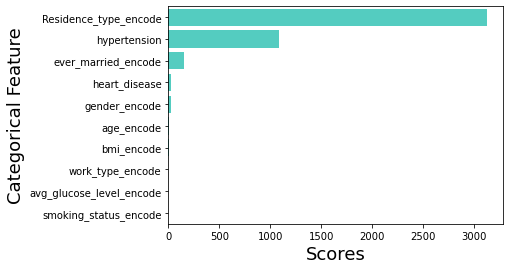

In [77]:
datset=pd.DataFrame()
datset['feature']=X.columns[range(len(sf_fit.scores_))]
datset['scores']=sf_fit.scores_
datset=datset.sort_values(by='scores',ascending=False)
sns.barplot(datset['scores'],datset['feature'],color='turquoise')
#sns.set_style('whitegrid')
plt.xlabel('Scores',fontsize=18)
plt.ylabel('Categorical Feature', fontsize=18)
plt.show

In [78]:
fscore=pd.Series(f_score[0])
fscore.index=X_train.columns
fscr=fscore.sort_values(ascending=False)
fscr

avg_glucose_level_encode    3131.424412
age_encode                  1085.336368
bmi_encode                   148.533955
hypertension                  29.673380
heart_disease                 23.512384
ever_married_encode            7.188125
work_type_encode               2.848765
gender_encode                  0.469980
smoking_status_encode          0.396984
Residence_type_encode          0.259286
dtype: float64

In [79]:
best=SelectKBest(chi2,k=7).fit(X_train,y_train)
X_train.columns[best.get_support()]

Index(['age_encode', 'hypertension', 'heart_disease',
       'avg_glucose_level_encode', 'bmi_encode', 'ever_married_encode',
       'work_type_encode'],
      dtype='object')

In [80]:
X_train=best.transform(X_train) #remove other features
X_train=best.transform(X_test)

In [81]:
df_cleaned=pd.concat([df_cleaned,pd.get_dummies(df_cleaned['work_type_encode'],prefix='Work_Type')],axis=1)
df_cleaned

,hypertension,heart_disease,stroke,gender_encode,Residence_type_encode,ever_married_encode,work_type_encode,smoking_status_encode,age_encode,bmi_encode,avg_glucose_level_encode,Work_Type_0,Work_Type_1,Work_Type_2,Work_Type_3,Work_Type_4
0,0,1,1,1,1,1,2,1,88,239,3374,0,0,1,0,0
1,0,0,1,0,0,1,3,2,82,183,3374,0,0,0,1,0
2,0,1,1,1,0,1,2,2,101,198,2483,0,0,1,0,0
3,0,0,1,0,1,1,2,3,70,217,3374,0,0,1,0,0
4,1,0,1,0,0,1,3,2,100,113,3374,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,0,1,1,2,2,101,143,1360,0,0,1,0,0
5106,0,0,1,0,1,1,3,2,102,273,3030,0,0,0,1,0
5107,0,0,0,0,0,1,3,2,56,179,1314,0,0,0,1,0
5108,0,0,0,1,0,1,2,1,72,129,3363,0,0,1,0,0


In [82]:
df_cleaned.drop(['work_type_encode'],axis=1)

,hypertension,heart_disease,stroke,gender_encode,Residence_type_encode,ever_married_encode,smoking_status_encode,age_encode,bmi_encode,avg_glucose_level_encode,Work_Type_0,Work_Type_1,Work_Type_2,Work_Type_3,Work_Type_4
0,0,1,1,1,1,1,1,88,239,3374,0,0,1,0,0
1,0,0,1,0,0,1,2,82,183,3374,0,0,0,1,0
2,0,1,1,1,0,1,2,101,198,2483,0,0,1,0,0
3,0,0,1,0,1,1,3,70,217,3374,0,0,1,0,0
4,1,0,1,0,0,1,2,100,113,3374,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,0,1,1,2,101,143,1360,0,0,1,0,0
5106,0,0,1,0,1,1,2,102,273,3030,0,0,0,1,0
5107,0,0,0,0,0,1,2,56,179,1314,0,0,0,1,0
5108,0,0,0,1,0,1,1,72,129,3363,0,0,1,0,0


In [83]:
df_cleaned.to_csv("C:\\Users\\blaise correia\\Documents\\sally\\df_cleaned21_sdata.csv")

# Random Forest Classifier

In [84]:
#this are the libraries we import for random forest classifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [85]:
#create an instance of pipeline
pipeline = make_pipeline(RandomForestClassifier(n_estimators=100, max_depth=4))
#pass instance of pipeline and training and test data set
#cv=10 represents the Stratified with 10 folds i.e dividing training data into 10 parts
df_cleaned=pd.read_csv("C:\\Users\\blaise correia\\Documents\\sally\\df_cleaned21_sd.csv")
X = df_cleaned.drop("stroke", axis=1) #all feature variables
y = df_cleaned["stroke"] #only target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=10, n_jobs=1) #pipeline means sequence
print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Cross Validation accuracy scores: [0.97206704 0.98044693 0.97486034 0.98882682 0.97765363 0.97765363
 0.96927374 0.97478992 0.97478992 0.9719888 ]
Cross Validation accuracy: 0.976 +/- 0.005


In [86]:
print('Mean:',np.mean(scores),' Stdev:',np.std(scores))

Mean: 0.9762350750356008  Stdev: 0.005198525474810085


#From here we can see that Random forest classifier gives 97.62% accuracy.

# Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(solver='lbfgs', max_iter=1000)
logit.fit(X_train,y_train)
y_predict=logit.predict(X_test)
y_predict

from sklearn.metrics import  confusion_matrix
cm=confusion_matrix(y_test,y_predict)#confusion matrix
print(cm)

[[1429    0]
 [  98    6]]


In [89]:
# 1429 are true positive(i.e 1429 of them had stroke and was detected correctly) 
#0 are false negative(i.e none of them had store and were falsely detected as no stroke) 
#98 are false positive(i.e 98 of them did not have stroke still were falsely given as stroke) 
# 6 are true negative (i.e they did not have stroke has had was detected the same)

In [90]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,threshholds=roc_curve(y_test,logit.predict_proba(X_test)[:,1])
print(fpr) #fpr:false positive rate tpr:true positive rate
print("################True positive rate###############")
print(tpr)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.99790063e-04
 6.99790063e-04 1.39958013e-03 1.39958013e-03 2.09937019e-03
 2.09937019e-03 2.79916025e-03 2.79916025e-03 3.49895031e-03
 3.49895031e-03 4.19874038e-03 4.19874038e-03 6.29811057e-03
 6.29811057e-03 7.69769069e-03 7.69769069e-03 8.39748076e-03
 8.39748076e-03 9.09727082e-03 9.09727082e-03 9.79706088e-03
 9.79706088e-03 1.04968509e-02 1.04968509e-02 1.11966410e-02
 1.11966410e-02 1.18964311e-02 1.18964311e-02 1.32960112e-02
 1.32960112e-02 1.39958013e-02 1.39958013e-02 1.46955913e-02
 1.46955913e-02 1.74947516e-02 1.74947516e-02 1.95941218e-02
 1.95941218e-02 2.79916025e-02 2.79916025e-02 3.00909727e-02
 3.00909727e-02 3.21903429e-02 3.21903429e-02 3.49895031e-02
 3.49895031e-02 3.98880336e-02 3.98880336e-02 4.12876137e-02
 4.12876137e-02 4.19874038e-02 4.19874038e-02 4.47865640e-02
 4.47865640e-02 4.61861442e-02 4.61861442e-02 4.96850945e-02
 4.96850945e-02 5.80825752e-02 5.80825752e-02 6.08817355e-02
 6.08817355e-02 6.787963

In [91]:
logit_roc_auc=roc_auc_score(y_test,logit.predict(X_test))
logit_roc_auc

0.5288461538461539

Logistic regression gives accuracy of 52.88%

graph of FPR VS TPR

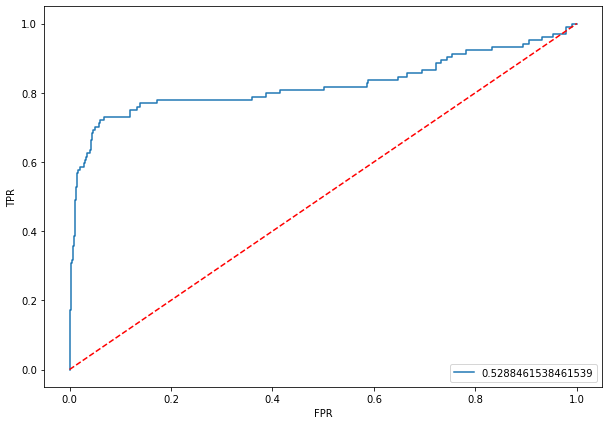

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label=logit_roc_auc)
plt.plot([0,1],[0,1],'r--')  # r is red in --
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()


Confusion Matrix

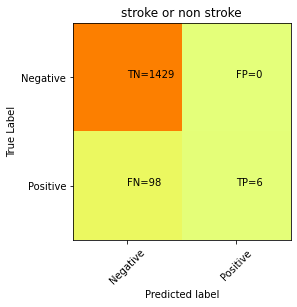

In [93]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)
classNames=['Negative','Positive']
plt.title('stroke or non stroke')
plt.xlabel('Predicted label')
plt.ylabel('True Label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s=[['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]))
plt.show()

# Support vector machine

In [94]:
svm_classifier = SVC(kernel="poly",degree=8)

In [95]:
svm_classifier.fit(X_train,y_train)

SVC(degree=8, kernel='poly')

In [96]:
prediction = svm_classifier.predict(X_test)

In [97]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [98]:
print(confusion_matrix(y_test,prediction))

[[1429    0]
 [ 104    0]]


In [99]:
print(accuracy_score(y_test,prediction))

0.9321591650358774


In [100]:
svm_classifier = SVC(kernel="rbf")
svm_classifier.fit(X_train,y_train)
prediction = svm_classifier.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))

[[1424    5]
 [  26   78]]
0.9797782126549249


#when we use kernel as rbf we get accuracy of 97.97%

In [101]:
svm_classifier = SVC(kernel="sigmoid")
svm_classifier.fit(X_train,y_train)
prediction = svm_classifier.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))

[[1429    0]
 [ 104    0]]
0.9321591650358774


#In SVM when we use kernel as sigmoid it gives Accuracy of 93.21%

In [102]:
#from the algorithms that I have use SVM classifier gives the best result i.e 97.97% with rbf kernel and 93.21% accuracy with sigmoid kernel.